In [4]:
!pip install pandas numpy matplotlib scikit-learn



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

print("All libraries imported successfully")


All libraries imported successfully


In [6]:
import pandas as pd

df = pd.read_csv("AI4I2020.csv")

print(df.head())
print(df.columns)


   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0  

In [7]:
df = df.drop(columns=["UDI", "Product ID", "Type",
                      "TWF", "HDF", "PWF", "OSF", "RNF"])

df = df.dropna()
df = df.reset_index(drop=True)


In [8]:
df.rename(columns={
    "Air temperature [K]": "Air_Temp",
    "Process temperature [K]": "Process_Temp",
    "Rotational speed [rpm]": "RPM",
    "Torque [Nm]": "Torque",
    "Tool wear [min]": "Tool_Wear",
    "Machine failure": "Target"
}, inplace=True)


In [9]:
features = ["Air_Temp", "Process_Temp", "RPM", "Torque", "Tool_Wear"]

X = df[features]
y = df["Target"]


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)


In [12]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [13]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.983
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1939
           1       0.83      0.56      0.67        61

    accuracy                           0.98      2000
   macro avg       0.91      0.78      0.83      2000
weighted avg       0.98      0.98      0.98      2000



In [14]:
def calculate_health(row):
    health = 100
    
    if row["Torque"] > 50:
        health -= 30
        
    if row["Process_Temp"] > 310:
        health -= 25
        
    if row["Tool_Wear"] > 200:
        health -= 25
        
    if row["RPM"] < 1300:
        health -= 20
        
    return max(0, health)

df["Health_Score"] = df.apply(calculate_health, axis=1)


In [15]:
failure_prob = model.predict_proba(X_scaled)[:,1]
df["Failure_Probability"] = failure_prob


In [16]:
import sqlite3

conn = sqlite3.connect("cnc_maintenance.db")
df.to_sql("Inspections", conn, if_exists="replace", index=False)
conn.close()


In [17]:
print(df.head())


   Air_Temp  Process_Temp   RPM  Torque  Tool_Wear  Target  Health_Score  \
0     298.1         308.6  1551    42.8          0       0           100   
1     298.2         308.7  1408    46.3          3       0           100   
2     298.1         308.5  1498    49.4          5       0           100   
3     298.2         308.6  1433    39.5          7       0           100   
4     298.2         308.7  1408    40.0          9       0           100   

   Failure_Probability  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0  


In [19]:
print(df.columns)


Index(['Air_Temp', 'Process_Temp', 'RPM', 'Torque', 'Tool_Wear', 'Target',
       'Health_Score', 'Failure_Probability'],
      dtype='str')


In [20]:
print(df.head())


   Air_Temp  Process_Temp   RPM  Torque  Tool_Wear  Target  Health_Score  \
0     298.1         308.6  1551    42.8          0       0           100   
1     298.2         308.7  1408    46.3          3       0           100   
2     298.1         308.5  1498    49.4          5       0           100   
3     298.2         308.6  1433    39.5          7       0           100   
4     298.2         308.7  1408    40.0          9       0           100   

   Failure_Probability  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0  


In [21]:
print(df[['Air_Temp',
          'RPM',
          'Torque',
          'Tool_Wear',
          'Health_Score',
          'Failure_Probability',
          'Target']].head())


   Air_Temp   RPM  Torque  Tool_Wear  Health_Score  Failure_Probability  \
0     298.1  1551    42.8          0           100                  0.0   
1     298.2  1408    46.3          3           100                  0.0   
2     298.1  1498    49.4          5           100                  0.0   
3     298.2  1433    39.5          7           100                  0.0   
4     298.2  1408    40.0          9           100                  0.0   

   Target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [22]:
print(df.describe())


           Air_Temp  Process_Temp           RPM        Torque     Tool_Wear  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean     300.004930    310.005560   1538.776100     39.986910    107.951000   
std        2.000259      1.483734    179.284096      9.968934     63.654147   
min      295.300000    305.700000   1168.000000      3.800000      0.000000   
25%      298.300000    308.800000   1423.000000     33.200000     53.000000   
50%      300.100000    310.100000   1503.000000     40.100000    108.000000   
75%      301.500000    311.100000   1612.000000     46.800000    162.000000   
max      304.500000    313.800000   2886.000000     76.600000    253.000000   

             Target  Health_Score  Failure_Probability  
count  10000.000000  10000.000000         10000.000000  
mean       0.033900     80.457500             0.033722  
std        0.180981     18.584879             0.150095  
min        0.000000      0.000000             0.000000  
25%

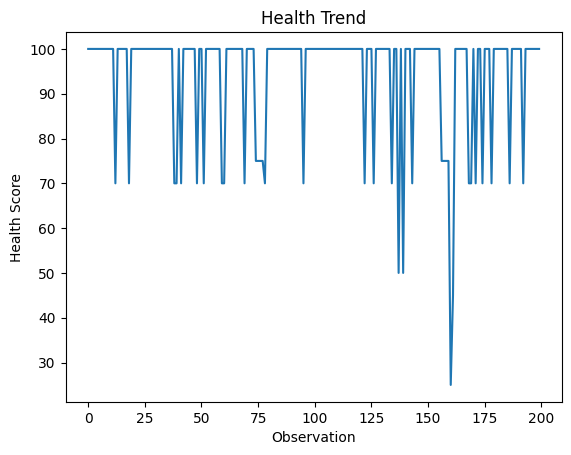

In [23]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(df['Health_Score'].head(200))
plt.title("Health Trend")
plt.xlabel("Observation")
plt.ylabel("Health Score")
plt.show()


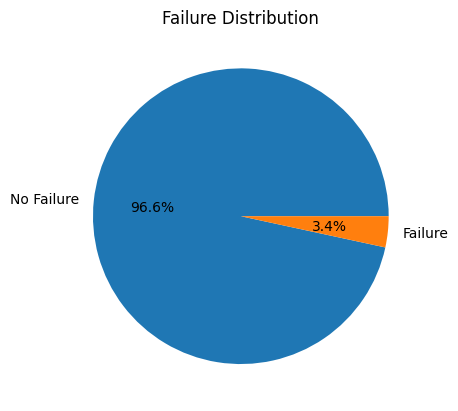

In [24]:
plt.figure()
plt.pie(df['Target'].value_counts(),
        labels=["No Failure","Failure"],
        autopct='%1.1f%%')
plt.title("Failure Distribution")
plt.show()


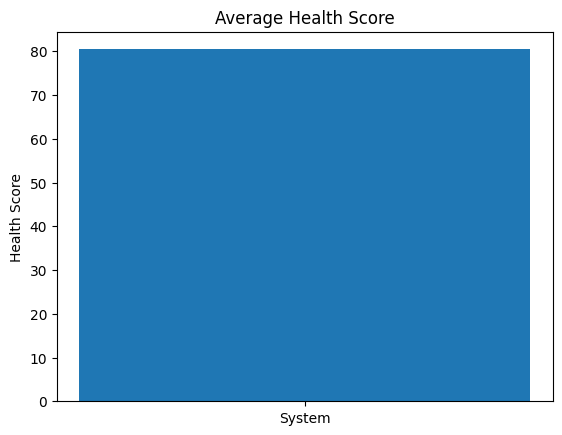

In [25]:
avg_health = df['Health_Score'].mean()

plt.figure()
plt.bar(["System"], [avg_health])
plt.ylabel("Health Score")
plt.title("Average Health Score")
plt.show()


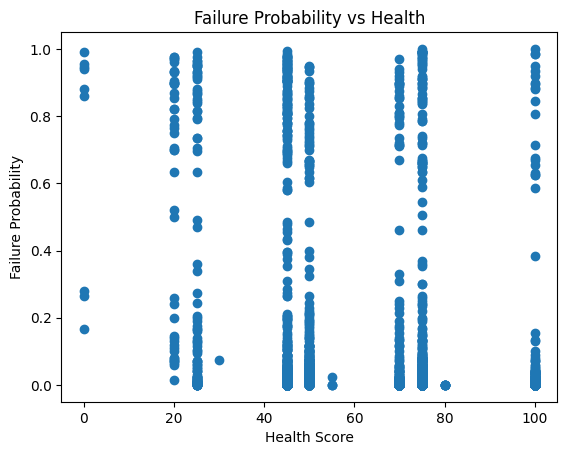

In [26]:
plt.figure()
plt.scatter(df['Health_Score'], df['Failure_Probability'])
plt.xlabel("Health Score")
plt.ylabel("Failure Probability")
plt.title("Failure Probability vs Health")
plt.show()


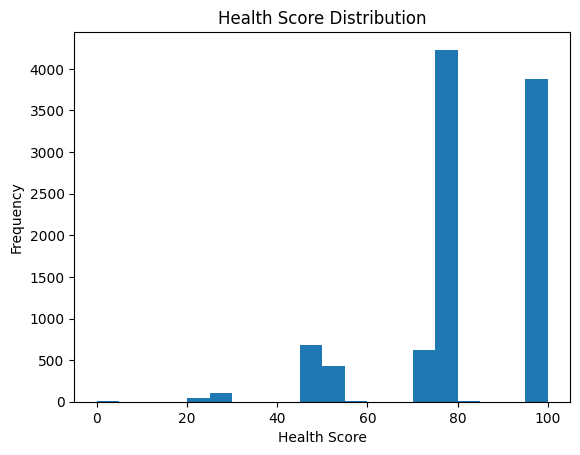

In [27]:
plt.figure()
plt.hist(df['Health_Score'], bins=20)
plt.xlabel("Health Score")
plt.ylabel("Frequency")
plt.title("Health Score Distribution")
plt.show()


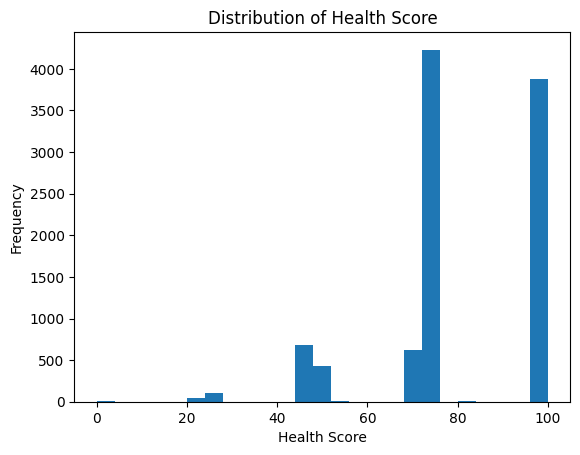

In [28]:
plt.figure()
plt.hist(df['Health_Score'], bins=25)
plt.xlabel("Health Score")
plt.ylabel("Frequency")
plt.title("Distribution of Health Score")
plt.show()


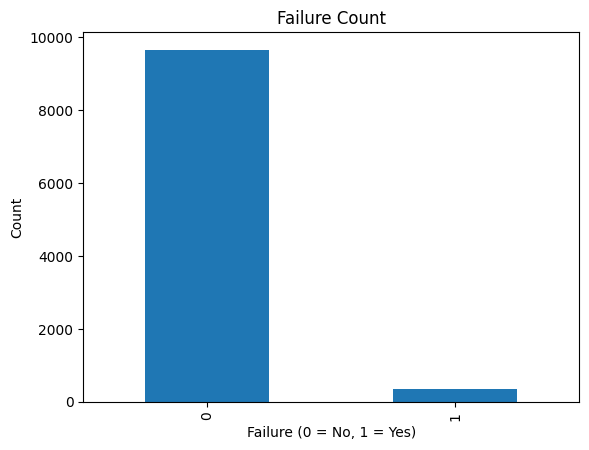

In [29]:
plt.figure()
df['Target'].value_counts().plot(kind='bar')
plt.xlabel("Failure (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("Failure Count")
plt.show()


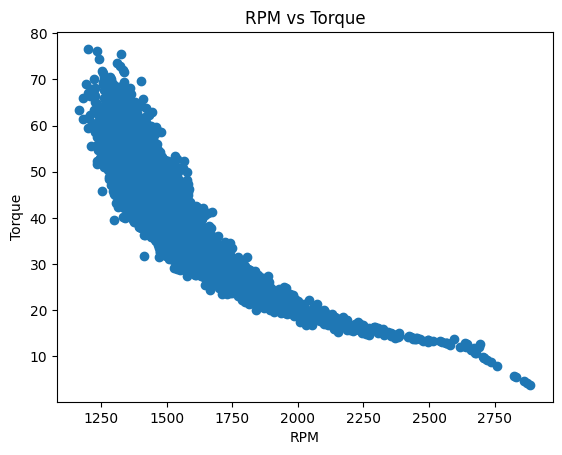

In [30]:
plt.figure()
plt.scatter(df['RPM'], df['Torque'])
plt.xlabel("RPM")
plt.ylabel("Torque")
plt.title("RPM vs Torque")
plt.show()


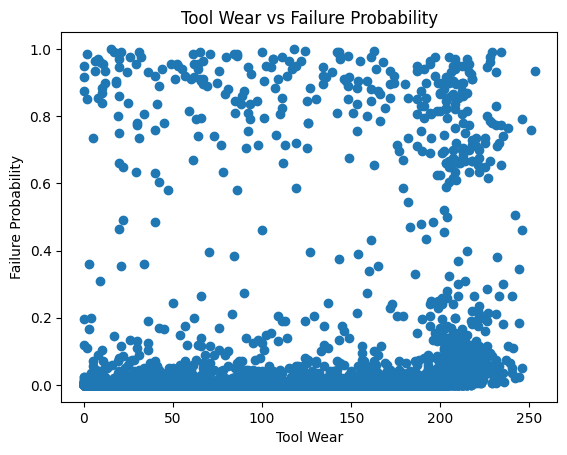

In [31]:
plt.figure()
plt.scatter(df['Tool_Wear'], df['Failure_Probability'])
plt.xlabel("Tool Wear")
plt.ylabel("Failure Probability")
plt.title("Tool Wear vs Failure Probability")
plt.show()


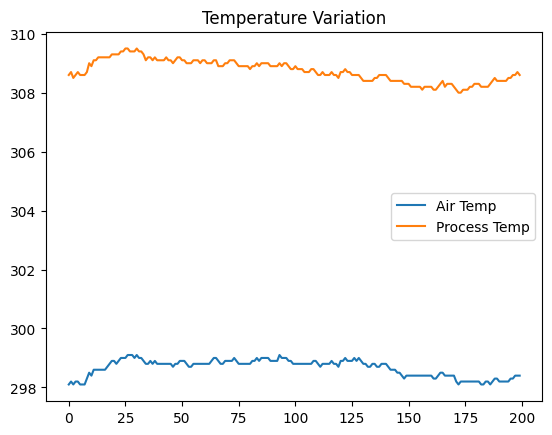

In [32]:
plt.figure()
plt.plot(df['Air_Temp'].head(200), label="Air Temp")
plt.plot(df['Process_Temp'].head(200), label="Process Temp")
plt.legend()
plt.title("Temperature Variation")
plt.show()


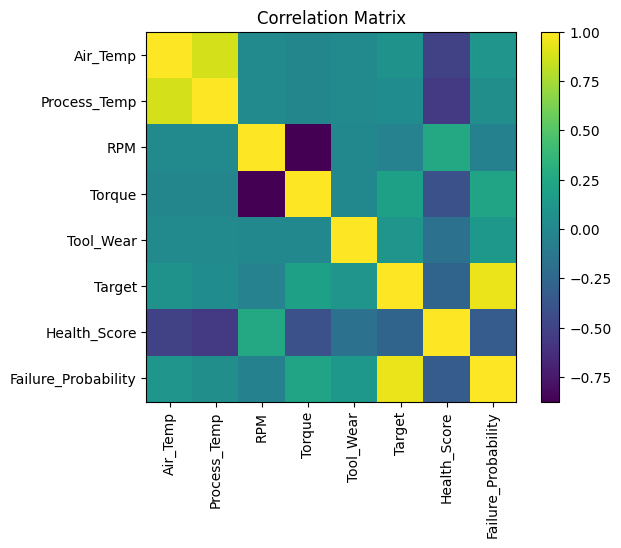

In [33]:
import numpy as np

corr = df.corr()

plt.figure()
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Matrix")
plt.show()


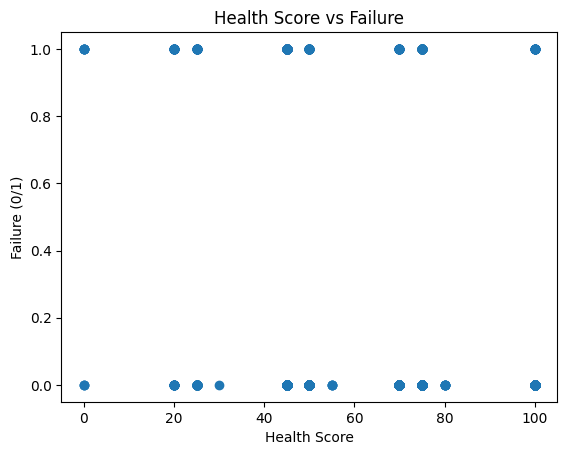

In [34]:
plt.figure()
plt.scatter(df['Health_Score'], df['Target'])
plt.xlabel("Health Score")
plt.ylabel("Failure (0/1)")
plt.title("Health Score vs Failure")
plt.show()


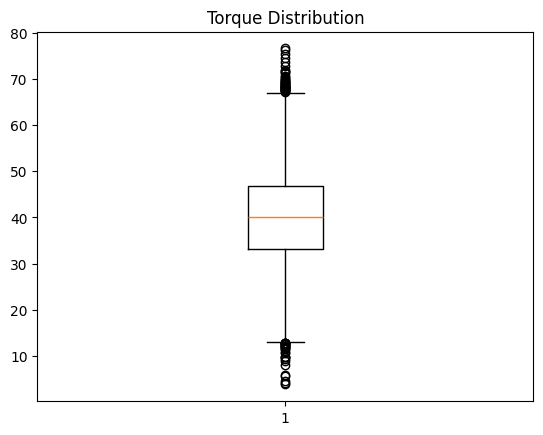

In [35]:
plt.figure()
plt.boxplot(df['Torque'])
plt.title("Torque Distribution")
plt.show()


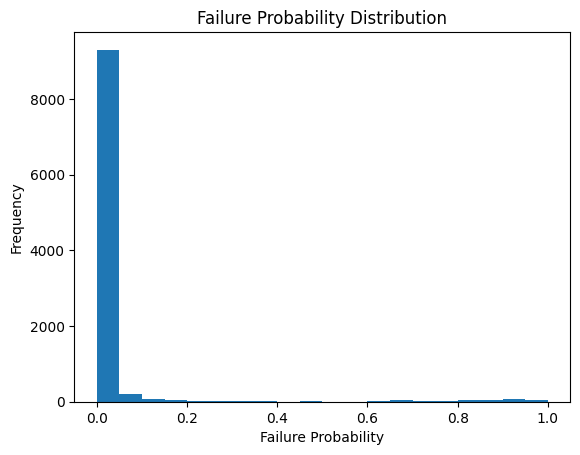

In [36]:
plt.figure()
plt.hist(df['Failure_Probability'], bins=20)
plt.xlabel("Failure Probability")
plt.ylabel("Frequency")
plt.title("Failure Probability Distribution")
plt.show()


In [37]:
df_present = df.copy()

df_present[['Air_Temp',
            'Process_Temp',
            'RPM',
            'Torque',
            'Tool_Wear',
            'Health_Score',
            'Failure_Probability']] = df_present[[
            'Air_Temp',
            'Process_Temp',
            'RPM',
            'Torque',
            'Tool_Wear',
            'Health_Score',
            'Failure_Probability']].round(2)

print(df_present.head(10))


   Air_Temp  Process_Temp   RPM  Torque  Tool_Wear  Target  Health_Score  \
0     298.1         308.6  1551    42.8          0       0           100   
1     298.2         308.7  1408    46.3          3       0           100   
2     298.1         308.5  1498    49.4          5       0           100   
3     298.2         308.6  1433    39.5          7       0           100   
4     298.2         308.7  1408    40.0          9       0           100   
5     298.1         308.6  1425    41.9         11       0           100   
6     298.1         308.6  1558    42.4         14       0           100   
7     298.1         308.6  1527    40.2         16       0           100   
8     298.3         308.7  1667    28.6         18       0           100   
9     298.5         309.0  1741    28.0         21       0           100   

   Failure_Probability  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0  
5            

In [38]:
critical = df_present.sort_values(by='Health_Score').head(10)

print("Top 10 Critical Machine Conditions:")
print(critical[['RPM','Torque','Tool_Wear','Health_Score','Failure_Probability']])


Top 10 Critical Machine Conditions:
       RPM  Torque  Tool_Wear  Health_Score  Failure_Probability
5988  1296    58.2        204             0                 0.28
6925  1266    55.5        210             0                 0.26
8277  1294    55.8        202             0                 0.16
8192  1229    65.2        209             0                 0.96
4984  1256    58.7        213             0                 0.86
7593  1270    67.5        208             0                 0.94
7591  1296    61.3        202             0                 0.88
5394  1262    70.5        234             0                 0.99
4642  1238    54.6        226             0                 0.94
5734  1369    56.2        208            20                 0.90


In [39]:
high_risk = df_present[df_present['Failure_Probability'] > 0.7]

print("High Risk Cases:")
print(high_risk[['RPM','Torque','Tool_Wear','Failure_Probability']].head())


High Risk Cases:
      RPM  Torque  Tool_Wear  Failure_Probability
50   2861     4.6        143                 0.98
69   1410    65.7        191                 0.94
160  1282    60.7        216                 0.93
161  1412    52.3        218                 0.73
168  1433    62.3         20                 0.86


In [40]:
print("------ SYSTEM SUMMARY ------")
print("Average Health Score:", round(df['Health_Score'].mean(),2))
print("Maximum Health Score:", df['Health_Score'].max())
print("Minimum Health Score:", df['Health_Score'].min())
print("Failure Rate (%):", round(df['Target'].mean()*100,2))
print("Average Failure Probability:", round(df['Failure_Probability'].mean(),2))


------ SYSTEM SUMMARY ------
Average Health Score: 80.46
Maximum Health Score: 100
Minimum Health Score: 0
Failure Rate (%): 3.39
Average Failure Probability: 0.03


In [41]:
df_present.head(10).style.set_caption("CNC Machine Operational Data").background_gradient(cmap='Blues')


,Air_Temp,Process_Temp,RPM,Torque,Tool_Wear,Target,Health_Score,Failure_Probability
0,298.100000,308.600000,1551,42.800000,0,0,100,0.000000
1,298.200000,308.700000,1408,46.300000,3,0,100,0.000000
2,298.100000,308.500000,1498,49.400000,5,0,100,0.000000
3,298.200000,308.600000,1433,39.500000,7,0,100,0.000000
4,298.200000,308.700000,1408,40.000000,9,0,100,0.000000
5,298.100000,308.600000,1425,41.900000,11,0,100,0.000000
6,298.100000,308.600000,1558,42.400000,14,0,100,0.000000
7,298.100000,308.600000,1527,40.200000,16,0,100,0.000000
8,298.300000,308.700000,1667,28.600000,18,0,100,0.000000
9,298.500000,309.000000,1741,28.000000,21,0,100,0.000000


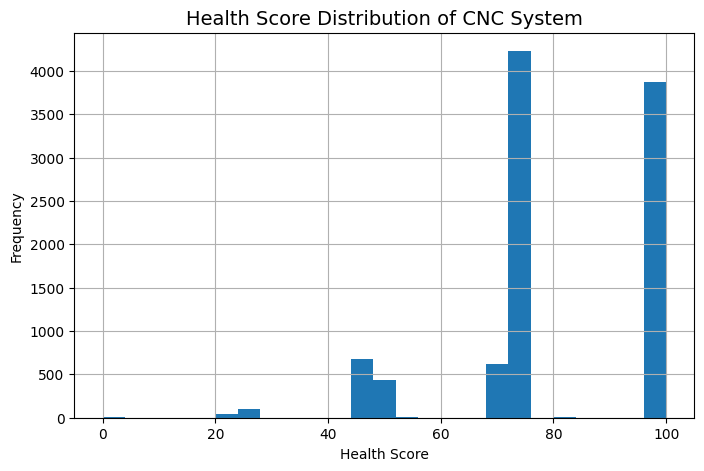

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df['Health_Score'], bins=25)
plt.title("Health Score Distribution of CNC System", fontsize=14)
plt.xlabel("Health Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [43]:
def health_status(score):
    if score >= 85:
        return "Healthy"
    elif score >= 60:
        return "Moderate"
    else:
        return "Critical"

df_present['Health_Status'] = df_present['Health_Score'].apply(health_status)

print(df_present[['Health_Score','Health_Status']].head())


   Health_Score Health_Status
0           100       Healthy
1           100       Healthy
2           100       Healthy
3           100       Healthy
4           100       Healthy


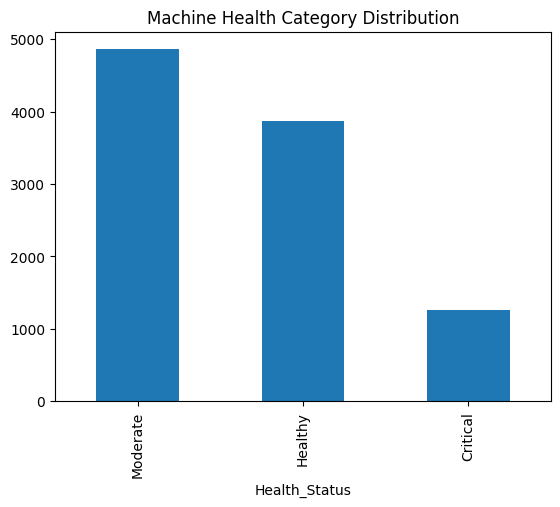

In [44]:
plt.figure()
df_present['Health_Status'].value_counts().plot(kind='bar')
plt.title("Machine Health Category Distribution")
plt.show()
